# Hands on Outlier Detection in Time Series - Qbee.io 

## Description

## Data set 

The data set contains various sensor records of a smart building system. The recorded environment consits of 51 rooms. Within each room 5 different sensors were deployed. The sensors measured: CO2 concentration, room air humidity, room temperature, luminosity, and PIR motion sensor data. The recording were conducted for a week, recording every 5 seconds.
The data set is provided by:
Dezhi Hong, Quanquan Gu, Kamin Whitehouse. High-dimensional Time Series Clustering via Cross-Predictability. In AISTATS'17.

## Load in sensor data 

In [1]:
import os 
os.chdir('/Users/matthiasboeker/Desktop/Simula_Consulting/Project_Qbee/Hands_on_Outlier_Detection')
import numpy as np 
os.chdir('Data')
files = os.listdir()
if '.DS_Store' in files:
    files.remove('.DS_Store')
if 'README.txt' in files:
    files.remove('README.txt')
#Sensor recording will be safed domain depending not location depending 
co2 = list()
light = list()
pir = list()
temp = list()
humidity = list()
#Load in data for 5 rooms 
for file in files[:5]:
    os.chdir(file)
    print('Load in sensor nr: ', file)
    co2.append(np.genfromtxt('co2.csv', delimiter=','))
    light.append(np.genfromtxt('light.csv', delimiter=','))
    pir.append(np.genfromtxt('pir.csv', delimiter=','))
    temp.append(np.genfromtxt('temperature.csv', delimiter=','))
    humidity.append(np.genfromtxt('humidity.csv', delimiter=','))
    os.chdir("..")

Load in sensor nr:  413
Load in sensor nr:  415
Load in sensor nr:  417
Load in sensor nr:  419
Load in sensor nr:  421


## Prepare the dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
for i in range(0,len(co2)):
    index = pd.date_range(pd.Timestamp("2013-08-23 00:00"), periods=len(co2[i]), freq='5s')
    co2[i] = pd.Series(co2[i][:,1], index= index)

for i in range(0,len(temp)):
    index = pd.date_range(pd.Timestamp("2013-08-23 00:00"), periods=len(temp[i]), freq='5s')
    temp[i] = pd.Series(temp[i][:,1], index= index)
    
for i in range(0,len(humidity)):
    index = pd.date_range(pd.Timestamp("2013-08-23 00:00"), periods=len(humidity[i]), freq='5s')
    humidity[i] = pd.Series(humidity[i][:,1], index= index)
    
for i in range(0,len(light)):
    index = pd.date_range(pd.Timestamp("2013-08-23 00:00"), periods=len(light[i]), freq='5s')
    light[i] = pd.Series(light[i][:,1], index= index)
    
for i in range(0,len(pir)):
    index = pd.date_range(pd.Timestamp("2013-08-23 00:00"), periods=len(pir[i]), freq='5s')
    pir[i] = pd.Series(pir[i][:,1], index= index)


In [3]:
co2_dic = {'Sensor1': co2[0].iloc[:130000],'Sensor2': co2[1].iloc[:130000],'Sensor3': co2[2].iloc[:130000],'Sensor4': co2[3].iloc[:130000],'Sensor5': co2[4].iloc[:130000]}
co2 = pd.DataFrame(data = co2_dic)
temp_dic = {'Sensor1': temp[0].iloc[:130000],'Sensor2': temp[1].iloc[:130000],'Sensor3': temp[2].iloc[:130000],'Sensor4': temp[3].iloc[:130000],'Sensor5': temp[4].iloc[:130000]}
temp = pd.DataFrame(data = temp_dic)
hum_dic = {'Sensor1': humidity[0].iloc[:130000],'Sensor2': humidity[1].iloc[:130000],'Sensor3': humidity[2].iloc[:130000],'Sensor4': humidity[3].iloc[:130000],'Sensor5': humidity[4].iloc[:130000]}
humidity = pd.DataFrame(data = hum_dic)
light_dic = {'Sensor1': light[0].iloc[:130000],'Sensor2': light[1].iloc[:130000],'Sensor3': light[2].iloc[:130000],'Sensor4': light[3].iloc[:130000],'Sensor5': light[4].iloc[:130000]}
light = pd.DataFrame(data = light_dic)
pir_dic = {'Sensor1': pir[0].iloc[:70000],'Sensor2': pir[1].iloc[:70000],'Sensor3': pir[2].iloc[:70000],'Sensor4': pir[3].iloc[:70000],'Sensor5': pir[4].iloc[:70000]}
pir = pd.DataFrame(data = pir_dic)



## Visualization of the time series

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


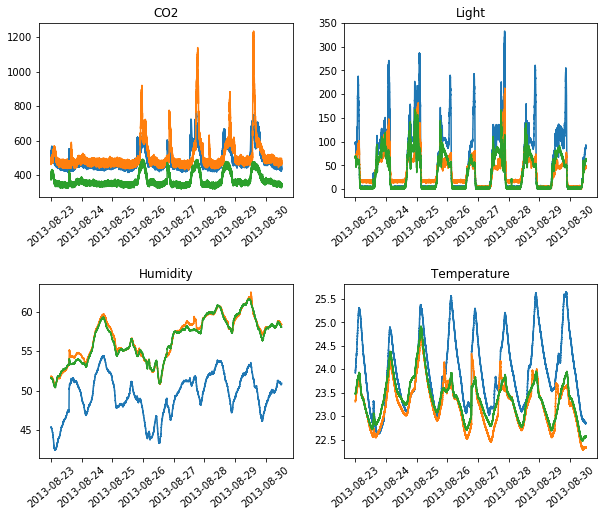

In [4]:
import matplotlib.pyplot as plt
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,8))
ax1.plot(co2['Sensor1'])
ax1.plot(co2['Sensor2'])
ax1.plot(co2['Sensor3'])
ax1.set_title('CO2')
ax1.tick_params(axis='x', labelrotation=40 )
ax2.plot(light['Sensor1'])
ax2.plot(light['Sensor2'])
ax2.plot(light['Sensor3'])
ax2.set_title('Light')
ax2.tick_params(axis='x', labelrotation=40 )
ax3.plot(humidity['Sensor1'])
ax3.plot(humidity['Sensor2'])
ax3.plot(humidity['Sensor3'])
ax3.set_title('Humidity')
ax3.tick_params(axis='x', labelrotation=40 )
ax4.plot(temp['Sensor1'])
ax4.plot(temp['Sensor2'])
ax4.plot(temp['Sensor3'])
ax4.set_title('Temperature')
ax4.tick_params(axis='x', labelrotation=40 )
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

## Properties of an time series 

### Decomposition in trend, seasonality, error 

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
result_co2 = seasonal_decompose(co2['Sensor1'], model='additive', period=17280)
result_temp = seasonal_decompose(temp['Sensor1'], model='additive', period=17280)
result_hum = seasonal_decompose(humidity['Sensor1'], model='additive', period=17280)
result_light = seasonal_decompose(light['Sensor1'], model='additive', period=17280)


### Temperature 

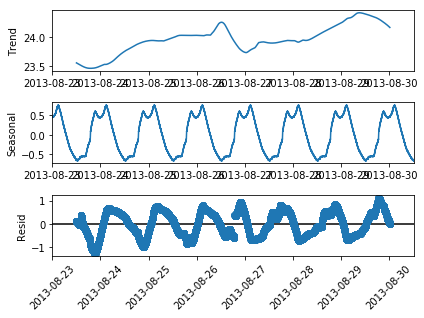

In [6]:
result_temp.plot(observed=False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

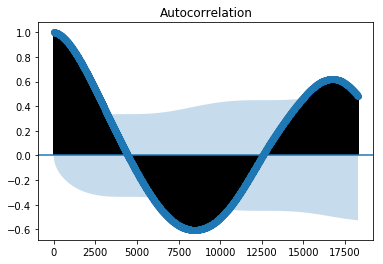

In [7]:
plot_acf(temp['Sensor1'], lags = 18280)
plt.show()

### Humidity 

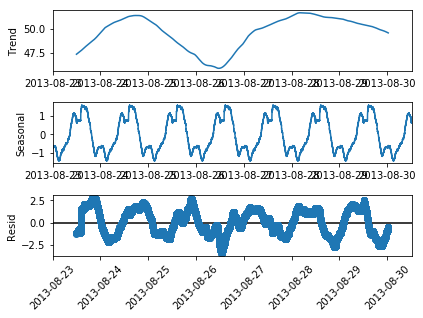

In [8]:
result_hum.plot(observed=False)
plt.xticks(rotation=45)
plt.show()

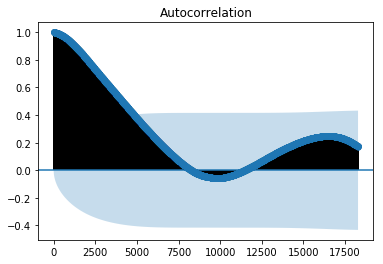

In [9]:
plot_acf(humidity['Sensor1'], lags = 18280)
plt.show()

### Light

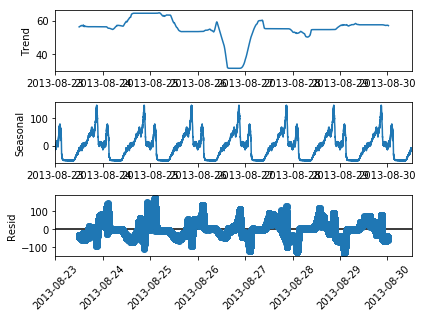

In [10]:
result_light.plot(observed=False)
plt.xticks(rotation=45)
plt.show()

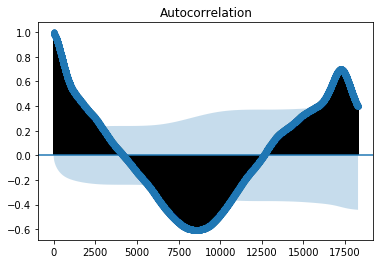

In [11]:
plot_acf(light['Sensor1'], lags = 18280)
plt.show()

### CO2

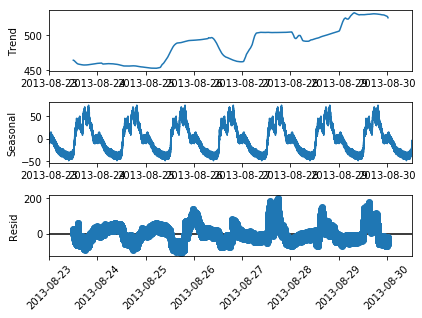

In [12]:
result_co2.plot(observed=False)
plt.xticks(rotation=45)
plt.show()

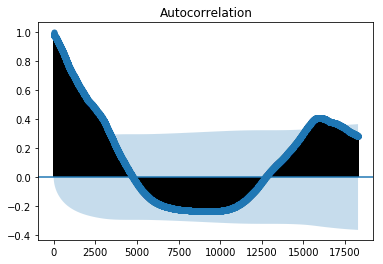

In [13]:
plot_acf(co2['Sensor1'], lags = 18280)
plt.show()

#### Decomposition
The time series is decomposed in three components: the trend, the seasonal component and the residuals. The additive model is presented: 

Time Series = Trend + Seasonality + Residuals

The applied decomposition is provided by the package "statsmodels". Statsmodels applies locally estimated scatterplot smoothing (Loess), which is a local polynomial regression. 

By analysing the seasonal component, each sensor reading reveals seasonality. Morover, the provided model does not explain all seasonality through the seasonal component. The residual component present some seasonality, too. Thus some sort of higher seasonality is included in the time series. 


#### Autocorrelation 
Each sensor reading reveals strong autocorrelation. Moreover, the autocorrelation plot shows a daily seasonality. The variable $x_t$ is very similar to $x_{t-17280}$. According to the 5 seconds sampling, represents the $x_{t-17280}$ a 24h lag. 

The variable $x_t$ is very dissimilar to $x_{t-8640}$, which represents a 12h lag. 

## Stationarity 

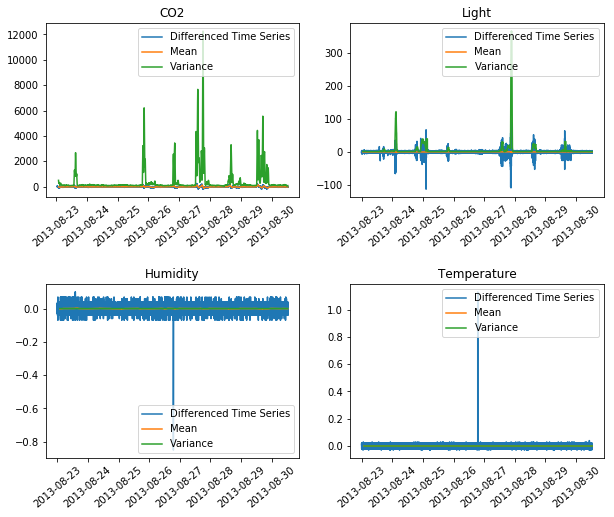

In [14]:
#Analysing the first to moments of the normal distribution. 
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,8))
ax1.plot(co2['Sensor1'].diff(720), label= 'Differenced Time Series')
ax1.plot(co2['Sensor1'].diff(720).rolling(720).mean(), label= 'Mean')
ax1.plot(co2['Sensor1'].diff(720).rolling(720).var(), label = 'Variance')
ax1.set_title('CO2')
ax1.legend(loc="upper right")
ax1.tick_params(axis='x', labelrotation=40 )
ax2.plot(light['Sensor1'].diff(), label = 'Differenced Time Series')
ax2.plot(light['Sensor1'].diff().rolling(720).mean(), label= 'Mean')
ax2.plot(light['Sensor1'].diff().rolling(720).var(), label = 'Variance')
ax2.set_title('Light')
ax2.legend(loc="upper right")
ax2.tick_params(axis='x', labelrotation=40 )
ax3.plot(humidity['Sensor1'].diff(), label= 'Differenced Time Series')
ax3.plot(humidity['Sensor1'].diff().rolling(1440).mean(), label= 'Mean')
ax3.plot(humidity['Sensor1'].diff().rolling(1440).var(), label = 'Variance')
ax3.set_title('Humidity')
ax3.legend(loc="lower right")
ax3.tick_params(axis='x', labelrotation=40 )
ax4.plot(temp['Sensor1'].diff(),label = 'Differenced Time Series')
ax4.plot(temp['Sensor1'].diff().rolling(1440).mean(),label= 'Mean')
ax4.plot(temp['Sensor1'].diff().rolling(1440).var(),  label = 'Variance')
ax4.set_title('Temperature')
ax4.legend(loc="upper right")
ax4.tick_params(axis='x', labelrotation=40 )
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

The condition of weak stationarity states, that the two first moments, namely the mean and variance of the joint distribution of a time series does not change over time. 
In order to investigate on stationarity the rolling mean and variance of the differenced time series is presented. 
For all four analysed sensor types the mean(orange) is constant. The rolling variance shows some irregularities for the sensor type CO2 and light. However, besides these short bursts, the sample variance appreas to be constant, too. 
Stationarity can be concluded. 

There are two statistical test, which can be conducted in order to test for stationarity. 
- **KPSS Test**
- **Augmented Dickey Fuller Test**

Both test are provided by the "statsmodels" package. 

## Analysis of the sample distributions

### Fourier transformation 

In [15]:
import scipy as sp
import scipy.fftpack

In [16]:
#Compute the FFT
temp_fft = sp.fftpack.fft(temp['Sensor1'])
#Compute the power spectral density (PSD)
temp_psd = 10* np.abs(temp_fft) ** 2
#Calculate the frequencies: 1/day
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / (24*720))
#Extract only positive frequencies, exclude the imaginary number
i = fftfreq > 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


In [17]:
fftfreq[i]

array([1.32923077e-01, 2.65846154e-01, 3.98769231e-01, ...,
       8.63960123e+03, 8.63973415e+03, 8.63986708e+03])

Text(0,0.5,'PSD (dB)')

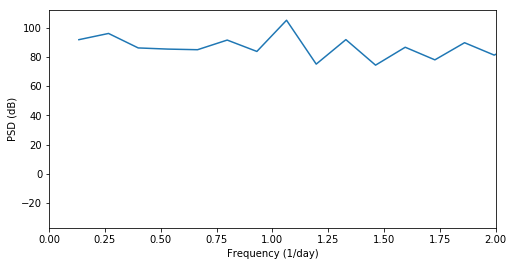

In [18]:
#Plot the power spectral density 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 2)
ax.set_xlabel('Frequency (1/day)')
ax.set_ylabel('PSD (dB)')

Each physical signal can be broken down into a series of discrete frequencies or a frequency spectrum over a continuous range. 
The power spectral density of the signal is this frequency spectrum. 

Distinct peaks within the signal reaveal a sine wave component. In this case: the PSD at frequency $f=1$ shows a peak. 

In [19]:
temp_fft_bis_high = temp_fft.copy()
temp_fft_bis_low = temp_fft.copy()
temp_fft_bis_med = temp_fft.copy()
temp_fft_bis_high[np.abs(fftfreq) < 1.1] = 0
temp_fft_bis_med[np.abs(fftfreq) > 1.1 ] = 0
temp_fft_bis_low[np.abs(fftfreq) > 0.5] = 0
temp_high = np.real(sp.fftpack.ifft(temp_fft_bis_high))
temp_low = np.real(sp.fftpack.ifft(temp_fft_bis_low))
temp_med = np.real(sp.fftpack.ifft(temp_fft_bis_med))


The signal can be decomposed by cutting off certain frequencies.
In the following, the low, medium and high frequencies are extracted and backtransformed into the time domain.

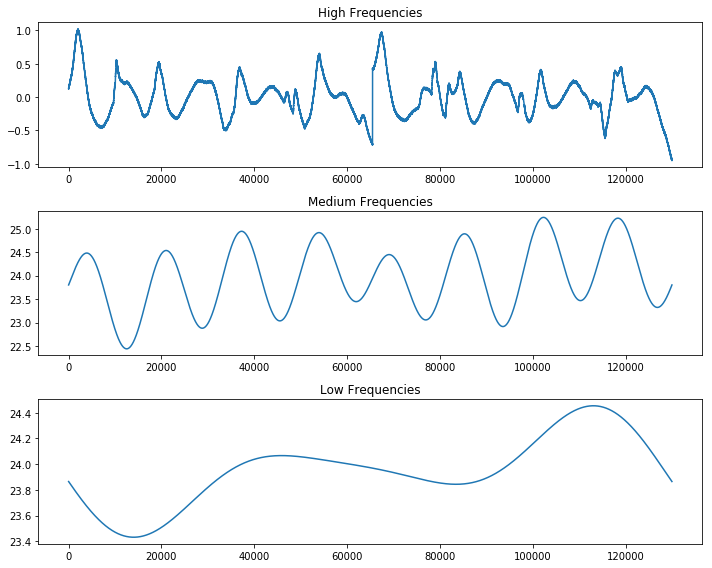

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10, 8))
ax1.plot(temp_high)
ax1.set_title('High Frequencies')
ax2.plot(temp_med)
ax2.set_title('Medium Frequencies')
ax3.plot(temp_low)
ax3.set_title('Low Frequencies')
plt.tight_layout()

##  Outlier Detection Algorithms 

Three different Algorithms are presented: 
- **DBSCAN clustering on window based FFT representation of PCA reduced time series**
- **SAX Decoding  **
- **Prediction based detection using ARIMA or MAD **

## DBSCAN clustering on window based FFT representation of PCA reduced time series

The outlier detection will be performed on the CO2 sensor readings. It will be approached as following. 
The process: 
    - Dimension Reduction 
    - Split data in training and test data 
    - Determining the window size 
    - Transform into FFT representation 
    - Apply DBSCAN

#### Dimension Reduction

Principal Component Analysis will be applied to reduce the dimension from the 5 given time series to only one univariate time series. 

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(co2)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

#### Plot the explained variance of the PCA 

First two components explain:  0.85 % total variance


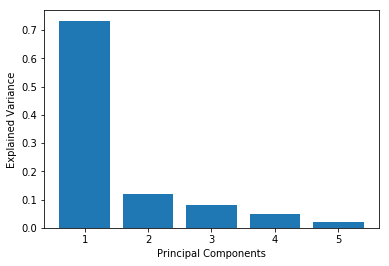

In [22]:
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
print('First two components explain: ',np.round(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1],2), '% total variance')

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(co2)
x = principalComponents[:,0]

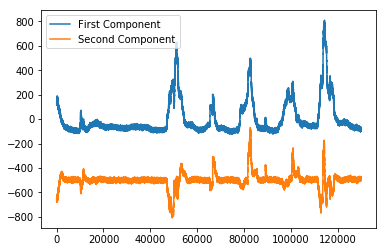

In [24]:
plt.plot(principalComponents[:,0], label='First Component')
plt.plot(principalComponents[:,1]-500, label='Second Component')
plt.legend()

The outlier detection algorithm will be applied only on the first principal component. 

#### Window based based FFT representation

The question of the window size and the forward step size is not straight forward to be answered. Usually domain knowledge comes in handy at this point. 
The window size can be seen as a tuning parameter and be trained during the training phase. 
In this analysis the window size of an hour will be applied.

In [25]:
w = 720
s = 360
co2_windows = pd.DataFrame([x[s*(i):(i*s+w)] for i in range(0,np.int(np.around(len(x)/s))-1)])

Extract the Fourier coefficients for high and low frequencies 

In [26]:
import scipy as sp
import scipy.fftpack
def calc_fft(x, freq):
    fft_ = sp.fftpack.fft(x)
    fftfreq = sp.fftpack.fftfreq(len(fft_), freq)
    j = fftfreq > 0
    fft_high = fft_.copy()
    fft_low = fft_.copy()
    fft_high[np.abs(fftfreq) < 1.1] = 0
    fft_low[np.abs(fftfreq) > 0.1] = 0
    high_coef = fft_high.real.sum()
    low_coef = fft_low.real.sum()
    return high_coef, low_coef

co2_fft = pd.DataFrame([calc_fft(co2_windows.iloc[i,:], (1. / (12))) for i in range(0,co2_windows.shape[0])])
co2_fft = co2_fft.iloc[:-1,:]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


### DBSCAN of the Fourier Coefficients 

#### Split the data for testing

In [27]:
def split_train_test(dat, ratio):
    train_size = np.int(len(dat)*ratio)
    x_train = dat[:train_size,:].copy()
    x_test = dat[train_size:,:].copy()
    return x_train, x_test
scaler = StandardScaler()
X = scaler.fit_transform(co2_fft)

In [238]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.5, min_samples=10, metric='euclidean',  algorithm='auto').fit_predict(X)

In [239]:
dic = {'low':X[:,0],'high': X[:,1], 'label':db}
train = pd.DataFrame(dic)

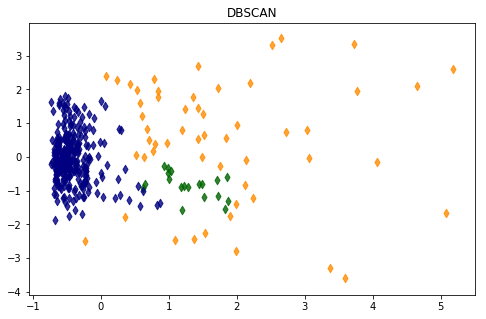

In [241]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x<0 else 'darkgreen' if x == 0 else 'navy' for x in train['label']]
shape = ['d' if k>0 else 'd' for k in train['label']]
for x, l, c, m in zip(train['low'], train['high'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('DBSCAN')

#### Backtransforming to the time series representation

In [31]:
a = pd.Series()
lab = pd.Series()
for i in range(0,co2_windows.shape[0]-1):
    lab = lab.append(pd.Series(np.repeat(train['label'][i],s)))
    a = a.append(co2_windows.iloc[i,:s]) 
    
a = a.reset_index()
lab = lab.reset_index()

In [32]:
dic = {'ts': a.iloc[:,1], 'label':lab.iloc[:,1]}
res = pd.DataFrame(dic)

Text(0.5,1,'DBSCAN on the PCA')

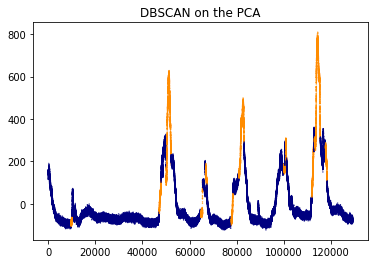

In [33]:
color = np.array(['darkorange' if x<0 else 'navy' for x in res['label']])
plt.scatter(res['ts'].index, res['ts'], c=color, marker='.', s=0.5)
plt.title('DBSCAN on the PCA')

In [34]:
x

0.05150830877078916

## SAX Decoding

In [35]:
from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
from saxpy.alphabet import cuts_for_asize
dat_znorm = co2_windows.T.apply(znorm, axis=0)
# PAA Representation
dat_paa = dat_znorm.apply(lambda x: paa(x, 10))
# Transformation into Sequences
seq = dat_paa.apply(lambda x: ts_to_string(x,cuts_for_asize(10)))

### Frequency based method 

In [36]:
total_seq = np.sum(seq)
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
freq_alph = np.array([[total_seq.count(letter)/len(total_seq)] for letter in alphabet]) 
alph = pd.DataFrame({'alphabet':np.asarray(alphabet),'freq':freq_alph.squeeze()})


In [37]:
#Frequency table of the alphabet
#0.05 quantile exludes: a and j 
alph

,alphabet,freq
0,a,0.018611
1,b,0.060833
2,c,0.081389
3,d,0.144444
4,e,0.202500
5,f,0.198056
6,g,0.134722
7,h,0.078056
8,i,0.053056
9,j,0.028333


In [38]:
labs = seq.str.contains(('a'or 'j'), regex=False).astype(int)

In [39]:
back = pd.Series()
b_lab = pd.Series()
for i in range(0,co2_windows.shape[0]-1):
    b_lab = b_lab.append(pd.Series(np.repeat(labs[i],s)))
    back = back.append(co2_windows.iloc[i,:s]) 
    
back = back.reset_index()
b_lab = b_lab.reset_index()
dic = {'ts': back.iloc[:,1], 'label':b_lab.iloc[:,1]}
res_sax = pd.DataFrame(dic)

([<matplotlib.axis.XTick at 0x12db920b8>,
 <a list of 10 Text xticklabel objects>)

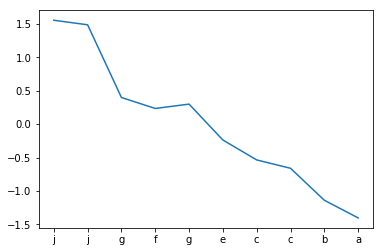

In [44]:
plt.plot(dat_paa.iloc[:,1])
plt.xticks(np.arange(10), ('j','j','g','f','g','e','c','c','b','a'))


Text(0.5,1,'Frequency based detection on SAX')

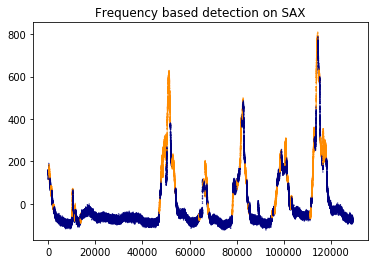

In [41]:
color = np.array(['darkorange' if x>0 else 'navy' for x in res_sax['label']])
plt.scatter(res_sax['ts'].index, res_sax['ts'], c=color, marker='.', s=0.5)
plt.title('Frequency based detection on SAX')

## Discrete Wavelet Transformation Representation and Isolation Forest Clustering 

In [255]:
import pywt
def calc_wcf(x, wavelet='Haar', level=5):
    coeffs = pywt.wavedec(x, wavelet, level = level)
    low_sum = np.sum(coeffs[0])
    high_sum = np.sum(coeffs[level-1])
    return np.array([low_sum, high_sum])


coeffs = co2_windows.T.apply(lambda x: calc_wcf(x,'Haar', level = 5)).T


In [256]:
scaler = StandardScaler()
X_iso = scaler.fit_transform(coeffs)

In [276]:
from sklearn.ensemble import IsolationForest
iso_f = IsolationForest(n_estimators=100, behaviour="new",max_features=1.,contamination='auto').fit_predict(X_iso)

In [277]:
dic_iso = {'low':X[:,0],'high': X[:,1], 'label':iso_f}
X_df = pd.DataFrame(dic_iso)

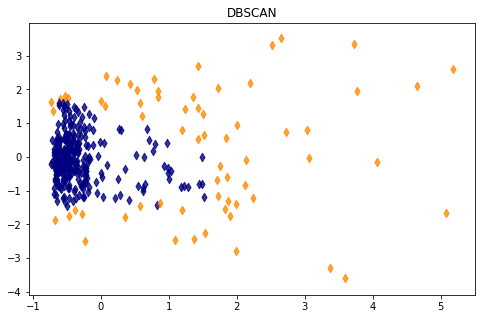

In [278]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x<0 else 'darkgreen' if x == 0 else 'navy' for x in X_df['label']]
shape = ['d' if k>0 else 'd' for k in X_df['label']]
for x, l, c, m in zip(X_df['low'], X_df['high'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.title('DBSCAN')


In [279]:
iso_s = pd.Series()
iso_lab = pd.Series()
for i in range(0,co2_windows.shape[0]-1):
    iso_lab = iso_lab.append(pd.Series(np.repeat(X_df['label'][i],s)))
    iso_s = iso_s.append(co2_windows.iloc[i,:s]) 
    
iso_s = iso_s.reset_index()
iso_lab = iso_lab.reset_index()
dic_res_iso = {'ts': iso_s.iloc[:,1], 'label':iso_lab.iloc[:,1]}
res_iso = pd.DataFrame(dic_res_iso)

Text(0.5,1,'Isolation Forest')

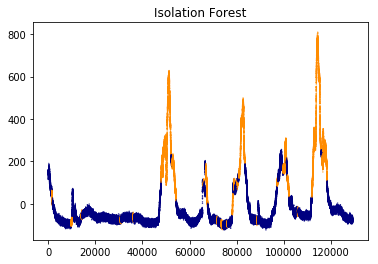

In [280]:
color = np.array(['darkorange' if x<0 else 'navy' for x in res_iso['label']])
plt.scatter(res_iso['ts'].index, res_iso['ts'], c=color, marker='.', s=0.5)
plt.title('Isolation Forest')

A signal feature that wavelets are very good at detecting is a discontinuity, or singularity. Abrupt transitions in signals result in wavelet coefficients with large absolute values.

